# Features

#### Marital Status
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

#### Nationality
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), 
India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, 
Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, 
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.




In [193]:
import numpy as np
import pandas as pd

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary-class']
nation = data['native-country']
nationCount = nation.value_counts()
married = data['marital-status']
marriedCount = married.value_counts()
label = data['salary-class']
labelCount = label.value_counts()

# Plotting Marital Status

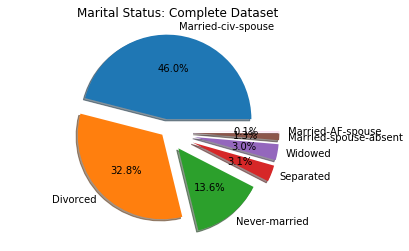

In [132]:
import matplotlib.pyplot as plt

#Plotting complete dataset
labels = 'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'
sizes = [marriedCount[0],marriedCount[1],marriedCount[2],marriedCount[3],marriedCount[4],marriedCount[5],
          marriedCount[6]]
explode = (0.15, 0.05, 0.25, 0.35, 0.35, 0.35, 0.35)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)

plt.title('Marital Status: Complete Dataset')
plt.axis('equal')
plt.show()


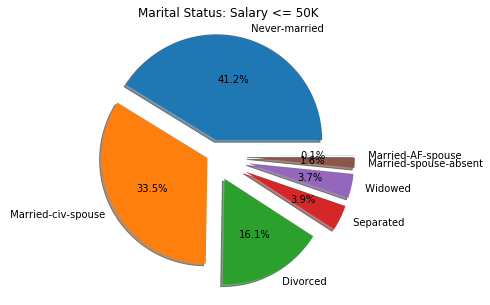

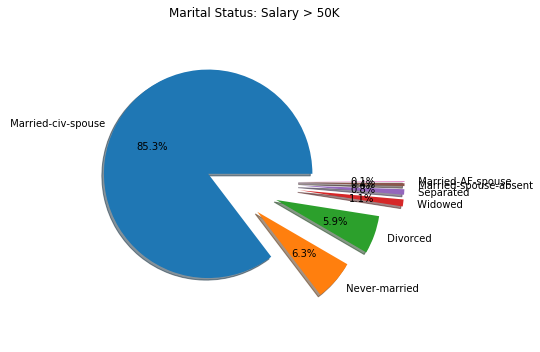

In [195]:
from collections import Counter
import matplotlib.pyplot as plt

#Plot with regards to salary ==> <=$50K, >$50K
marriedBelow = list()
marriedAbove = list()
for idx, x in enumerate(married):
    #print label[idx]
    #print type(label[idx])
    if label[idx].strip() == '<=50K':
        marriedBelow.append(x)
    else:
        marriedAbove.append(x)

marriedBelowCount = Counter(marriedBelow).most_common()
marriedAboveCount = Counter(marriedAbove).most_common()


labels1 = [item for item, _ in marriedBelowCount]
sizes1 = [count for _ , count in marriedBelowCount]
labels2 = [item for item, _ in marriedAboveCount]
sizes2 = [count for _ , count in marriedAboveCount]
explode1 = (0.15, 0.05, 0.25, 0.35, 0.35, 0.35, 0.35)  
explode2 = (0.15, 0.45, 0.55, 0.75, 0.75, 0.75, 0.75)  
plt.figure(figsize=(5,5))
plt.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Marital Status: Salary <= 50K')
plt.axis('equal')
plt.figure(figsize=(5,5))
plt.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Marital Status: Salary > 50K')
plt.tight_layout()
plt.axis('equal')
plt.show()

# Plotting Nationality

In [197]:
from collections import Counter
import matplotlib.pyplot as plt

print nationCount

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 